In [35]:
using AlgebraicPetri

using OrdinaryDiffEq
using StochasticDiffEq
using DiffEqJump
using Plots
using LabelledArrays
using Catlab
using Catlab.Graphics
using Catlab.WiringDiagrams
using Catlab.CategoricalAlgebra
using Catlab.Programs.RelationalPrograms

display_uwd(ex) = to_graphviz(ex, box_labels=:name, junction_labels=:variable, edge_attrs=Dict(:len=>".75"));

┌ Info: Precompiling DiffEqJump [c894b116-72e5-5b58-be3c-e6d8d4ac2b12]
└ @ Base loading.jl:1342
┌ Warning: Module DiffEqBase with build ID 18039643207670 is missing from the cache.
│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Info: Skipping precompilation since __precompile__(false). Importing DiffEqJump [c894b116-72e5-5b58-be3c-e6d8d4ac2b12].
└ @ Base loading.jl:1047


In [3]:
sirLabeled = LabelledPetriNet([:S, :I, :R], :inf=>((:S,:I)=>(:I,:I)), :rec=>(:I=>:R))

LabelledPetriNet with elements T = 1:2, S = 1:3, I = 1:3, O = 1:3
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │   inf │
│ 2 │   rec │
└───┴───────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     I │
│ 3 │     R │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  2 │
│ 3 │  2 │  2 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  1 │  2 │
│ 3 │  2 │  3 │
└───┴────┴────┘

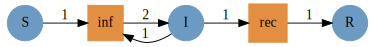

In [4]:
Graph(sirLabeled)

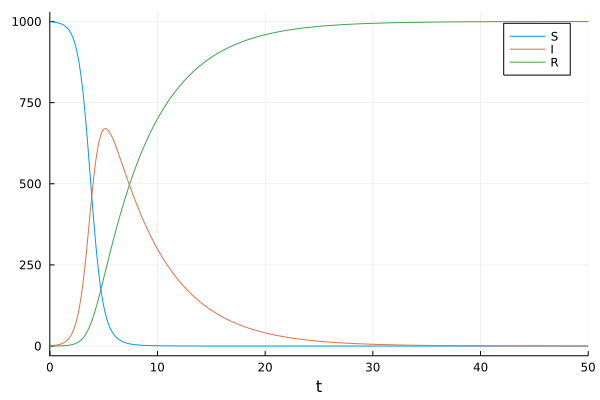

In [24]:
initialState = LVector(S=999, I=1, R=0);
params = LVector(inf=0.002, rec=0.2);
prob = ODEProblem(vectorfield(sirLabeled),initialState,(0.0,50.0),params);
sol = solve(prob,Tsit5(),abstol=1e-8);
plot(sol)

In [44]:
sirLabeledDisambiguated = LabelledPetriNet([:S_S, :S_I, :S_R], :inf=>((:S_S,:S_I)=>(:S_I,:S_I)), :rec=>(:S_I=>:S_R))

LabelledPetriNet with elements T = 1:2, S = 1:3, I = 1:3, O = 1:3
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │   inf │
│ 2 │   rec │
└───┴───────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │   S_S │
│ 2 │   S_I │
│ 3 │   S_R │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  2 │
│ 3 │  2 │  2 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  1 │  2 │
│ 3 │  2 │  3 │
└───┴────┴────┘

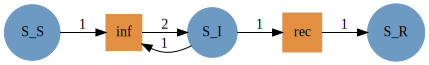

In [45]:
Graph(sirLabeledDisambiguated)

In [65]:
sirsLabeledDisambiguated = LabelledPetriNet([:S_S, :S_I, :S_R], :inf=>((:S_S,:S_I)=>(:S_I,:S_I)), :rec=>(:S_I=>:S_R), :waning=>(:S_R=>:S_S))

LabelledPetriNet with elements T = 1:3, S = 1:3, I = 1:4, O = 1:4
┌───┬────────┐
│ T │  tname │
├───┼────────┤
│ 1 │    inf │
│ 2 │    rec │
│ 3 │ waning │
└───┴────────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │   S_S │
│ 2 │   S_I │
│ 3 │   S_R │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  2 │
│ 3 │  2 │  2 │
│ 4 │  3 │  3 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  1 │  2 │
│ 3 │  2 │  3 │
│ 4 │  3 │  1 │
└───┴────┴────┘

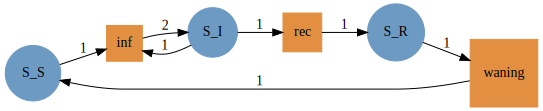

In [66]:
Graph(sirsLabeledDisambiguated)

In [68]:
sirTreatmentMediatedLabeledDisambiguated = LabelledPetriNet([:S_S, :S_I, :S_R, :S_H], :inf=>((:S_S,:S_I)=>(:S_I,:S_I)), :rec=>((:S_I,:S_H)=>(:S_R,:S_H)))

LabelledPetriNet with elements T = 1:2, S = 1:4, I = 1:4, O = 1:4
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │   inf │
│ 2 │   rec │
└───┴───────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │   S_S │
│ 2 │   S_I │
│ 3 │   S_R │
│ 4 │   S_H │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  2 │
│ 3 │  2 │  2 │
│ 4 │  2 │  4 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  1 │  2 │
│ 3 │  2 │  3 │
│ 4 │  2 │  4 │
└───┴────┴────┘

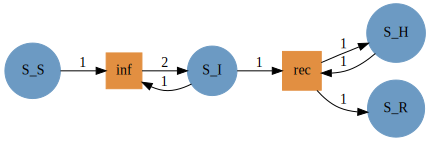

In [69]:
Graph(sirTreatmentMediatedLabeledDisambiguated)

In [70]:
seirLabeled = LabelledPetriNet([:S_S, :S_E, :S_I, :S_R], :inf=>((:S_S,:S_I)=>(:S_E,:S_I)), :postLat=>(:S_E=>:S_I), :rec=>(:S_I=>:S_R))

LabelledPetriNet with elements T = 1:3, S = 1:4, I = 1:4, O = 1:4
┌───┬─────────┐
│ T │   tname │
├───┼─────────┤
│ 1 │     inf │
│ 2 │ postLat │
│ 3 │     rec │
└───┴─────────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │   S_S │
│ 2 │   S_E │
│ 3 │   S_I │
│ 4 │   S_R │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  3 │
│ 3 │  2 │  2 │
│ 4 │  3 │  3 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  1 │  3 │
│ 3 │  2 │  3 │
│ 4 │  3 │  4 │
└───┴────┴────┘

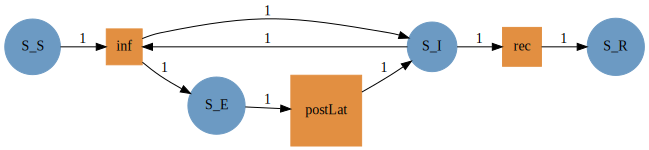

In [71]:
Graph(seirLabeled)

In [74]:
seiarLabeled = LabelledPetriNet([:S, :E, :I, :A, :R], :inf=>((:S,:I)=>(:E,:I)), :symp=>(:E=>:I), :asymp=>(:E=>:A), :recS=>(:I=>:R), :recA=>(:A=>:R))

T,tname
1,inf
2,symp
3,asymp
4,recS
5,recA
S,sname
1,S
2,E
3,I
4,A


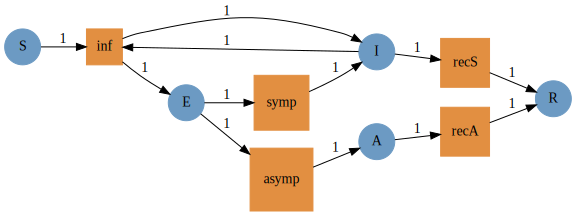

In [75]:
Graph(seiarLabeled)

In [14]:
seirsLabeled = LabelledPetriNet([:S, :E, :I, :R], :inf=>((:S,:I)=>(:E,:I)), :postLatency=>(:E=>:I), :rec=>(:I=>:R), :waning=>(:R=>:S))

LabelledPetriNet with elements T = 1:4, S = 1:4, I = 1:5, O = 1:5
┌───┬─────────────┐
│ T │       tname │
├───┼─────────────┤
│ 1 │         inf │
│ 2 │ postLatency │
│ 3 │         rec │
│ 4 │      waning │
└───┴─────────────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     E │
│ 3 │     I │
│ 4 │     R │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  3 │
│ 3 │  2 │  2 │
│ 4 │  3 │  3 │
│ 5 │  4 │  4 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  1 │  3 │
│ 3 │  2 │  3 │
│ 4 │  3 │  4 │
│ 5 │  4 │  1 │
└───┴────┴────┘

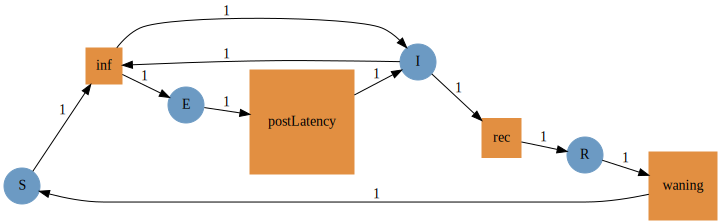

In [15]:
Graph(seirsLabeled)

In [54]:
seirsTreatmentMediated = LabelledPetriNet([:S, :E, :I, :R, :H], :inf=>((:S,:I)=>(:E,:I)), :postLatency=>(:E=>:I), :rec=>((:H,:I)=>((:H,:R))), :waning=>(:R=>:S))

T,tname
1,inf
2,postLatency
3,rec
4,waning
S,sname
1,S
2,E
3,I
4,R
5,H


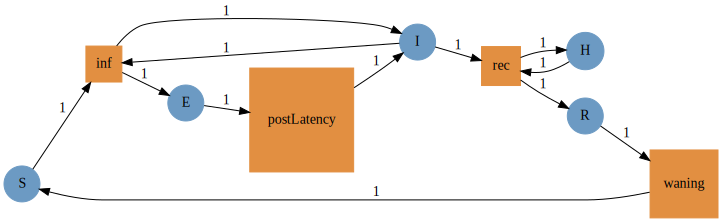

In [17]:
Graph(seirsTreatmentMediated)

In [48]:
print(TransitionMatrices(seirsTreatmentMediated))

TransitionMatrices([1 0 1 0 0; 0 1 0 0 0; 0 0 1 0 1; 0 0 0 1 0], [0 1 1 0 0; 0 0 1 0 0; 0 0 0 1 1; 1 0 0 0 0])

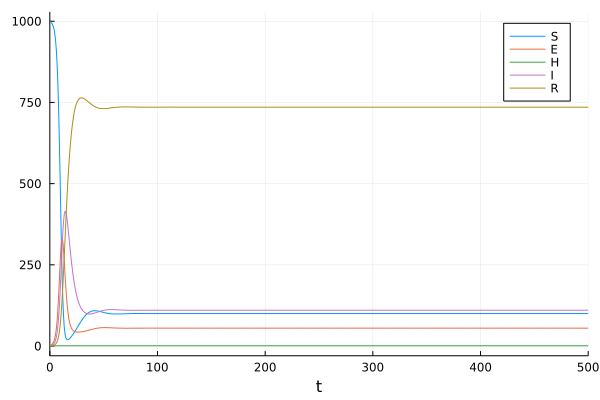

In [30]:
initialState = LVector(S=999, E=1, H=1, I=1, R=0);
params = LVector(inf=0.002, postLatency=0.4, rec=0.2, waning=0.03);
prob = ODEProblem(vectorfield(seirsTreatmentMediated),initialState,(0.0,500.0),params);
sol = solve(prob,Tsit5(),abstol=1e-8);
plot(sol)

In [57]:
vaccineHCWSimple = LabelledPetriNet([:S, :H, :VFull, :VPartial], :vacc=>((:S,:H)=>(:VFull,:H)), :wane1=>(:VFull=>:VPartial), :wane2=>(:VPartial=>:S))

LabelledPetriNet with elements T = 1:3, S = 1:4, I = 1:4, O = 1:4
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │  vacc │
│ 2 │ wane1 │
│ 3 │ wane2 │
└───┴───────┘
┌───┬──────────┐
│ S │    sname │
├───┼──────────┤
│ 1 │        S │
│ 2 │        H │
│ 3 │    VFull │
│ 4 │ VPartial │
└───┴──────────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  2 │
│ 3 │  2 │  3 │
│ 4 │  3 │  4 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  3 │
│ 2 │  1 │  2 │
│ 3 │  2 │  4 │
│ 4 │  3 │  1 │
└───┴────┴────┘

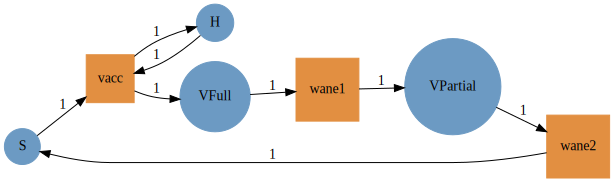

In [58]:
Graph(vaccineHCWSimple)

In [59]:
vaccineDoseSimple = LabelledPetriNet([:S, :D, :VFull, :VPartial], :vacc=>((:S,:D)=>:VFull), :wane1=>(:VFull=>:VPartial), :wane2=>(:VPartial=>:S))

LabelledPetriNet with elements T = 1:3, S = 1:4, I = 1:4, O = 1:3
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │  vacc │
│ 2 │ wane1 │
│ 3 │ wane2 │
└───┴───────┘
┌───┬──────────┐
│ S │    sname │
├───┼──────────┤
│ 1 │        S │
│ 2 │        D │
│ 3 │    VFull │
│ 4 │ VPartial │
└───┴──────────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  2 │
│ 3 │  2 │  3 │
│ 4 │  3 │  4 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  3 │
│ 2 │  2 │  4 │
│ 3 │  3 │  1 │
└───┴────┴────┘

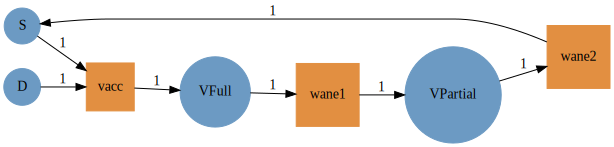

In [60]:
Graph(vaccineDoseSimple)

In [61]:
vaccineHCWDoseSimple = LabelledPetriNet([:S, :H, :D, :VFull, :VPartial], :vacc=>((:S,:D, :H)=>(:VFull, :H)), :wane1=>(:VFull=>:VPartial), :wane2=>(:VPartial=>:S))

LabelledPetriNet with elements T = 1:3, S = 1:5, I = 1:5, O = 1:4
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │  vacc │
│ 2 │ wane1 │
│ 3 │ wane2 │
└───┴───────┘
┌───┬──────────┐
│ S │    sname │
├───┼──────────┤
│ 1 │        S │
│ 2 │        H │
│ 3 │        D │
│ 4 │    VFull │
│ 5 │ VPartial │
└───┴──────────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  3 │
│ 3 │  1 │  2 │
│ 4 │  2 │  4 │
│ 5 │  3 │  5 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  4 │
│ 2 │  1 │  2 │
│ 3 │  2 │  5 │
│ 4 │  3 │  1 │
└───┴────┴────┘

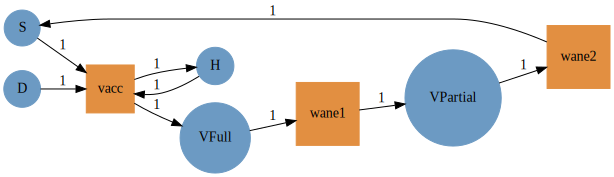

In [62]:
Graph(vaccineHCWDoseSimple)

In [63]:
vaccineWaning = LabelledPetriNet([:S, :VFull, :VPartial], :wane1=>(:VFull=>:VPartial), :wane2=>(:VPartial=>:S))

LabelledPetriNet with elements T = 1:2, S = 1:3, I = 1:2, O = 1:2
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │ wane1 │
│ 2 │ wane2 │
└───┴───────┘
┌───┬──────────┐
│ S │    sname │
├───┼──────────┤
│ 1 │        S │
│ 2 │    VFull │
│ 3 │ VPartial │
└───┴──────────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  2 │  3 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  3 │
│ 2 │  2 │  1 │
└───┴────┴────┘

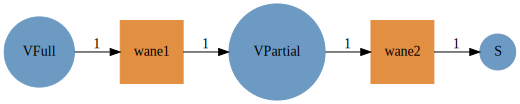

In [64]:
Graph(vaccineWaning)